# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [14]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [15]:
calls = data[['call']]
calls

,call
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [16]:
race = data[['race']]
race

,race
0,w
1,w
2,b
3,b
4,w
5,w
6,w
7,b
8,b
9,b


In [17]:
# number of callbacks for black-sounding names
print("The number of callbacks for black-sounding names:", sum(data[data.race=='b'].call))
# number of callbacks for white-sounding names
print("The number of callbacks for white-sounding names:", sum(data[data.race=='w'].call))
# total sample size
print("The total sample size for blacks is:", len(data[data.race == 'b']))
print("The total sample size for whites is:", len(data[data.race == 'w']))

The number of callbacks for black-sounding names: 157.0
The number of callbacks for white-sounding names: 235.0
The total sample size for blacks is: 2435
The total sample size for whites is: 2435


In [18]:
w = data[data.race=='w']
b = data[data.race=='b']

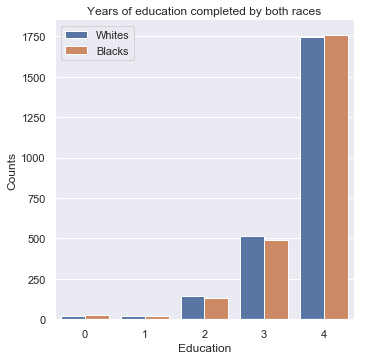

In [21]:
# Let's see visually if there is any difference in education between the races
# I assume 1, 2, 3, 4 in the education column are 1, 2, 3 or 4 years (respectively) of college completed.
# Since we have two categories, I will plot seaborn categorical plot
sns.catplot(x='education', data=data, hue='race', kind='count', legend=False)
plt.title('Years of education completed by both races')
plt.xlabel('Education')
plt.ylabel('Counts')
plt.legend(['Whites', 'Blacks'])
plt.show()

It doesn't stand out that there might be any difference in education levels completed by both races. So we can rule out education plays a role in difference in callouts, if any.

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

__Question 1: What test is appropriate for this problem? Does CLT apply?__

Here we have two independent samples (white vs black) and we don't know the standard deviation of the population, 2 sample t-test would be appropriate for this problem.
__*Central Limit Theorem*__ states that if you draw an SRS of size n from any population with mean mu and finite standard deviation sigma and when n is large, the sampling distribution of the sample mean x(bar) is approxiamately normal. In this case the sample size can be considered large (2435 for each race).

__Question 2: What are the null and alternate hypotheses?__

__Null Hypothesis, H0:__ There is no difference between callbacks between white and black applicants. In other words, the callbacks are not based on race.
__Alternate Hypothesis, Ha:__ There is difference between callbacks between white and black applicants. In other words, race does play a role in the callbacks.

__significance level = 0.05__

__Question 3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.__

In [42]:
# Your solution to Q3 here
# proportions for black and white sounding names
calls = data[['call']]
calls_b = sum(data[data.race=='b'].call) # calls for black sounding names
calls_w = sum(data[data.race=='w'].call) # calls for white sounding names
prop_b = calls_b/len(data[data.race=='b']) # proportions for callbacks for blacks
prop_w = calls_w/len(data[data.race=='w']) # proportions for callbacks for whites
prop_diff = prop_w - prop_b # difference in proportions for callouts
print("Total callbacks: %d, and proportion of callbacks: %.4f, for black sounding names." % (calls_b, prop_b))
print("Total callbacks: %d, and proportion of callbacks: %.4f, for white sounding names." % (calls_w, prop_w))
print("Difference in proportions for callouts: ", prop_diff)

# variance and std deviation
var_b = (prop_b * (1 - prop_b))/(len(data[data.race=='b'])) # variance for blacks
var_w = (prop_w * (1 - prop_w))/(len(data[data.race=='w'])) # variance for whites
print("Variances for blacks: %f, and for whites: %f" % (var_b, var_w)) 

var_total = var_b + var_w # total variance
print("The variance of the distribution of the differences in proportions of blacks and whites is:", var_total)

# Standard deviation
std = np.sqrt(var_total)
print("The standard deviation of the distribution of proportion differences is:", std)

# margin of error for 95% confidence interval
moe = 1.96 * std
print("The margin of error for 95% confidence interval is:", moe)

# 95% confidence interval
left = prop_diff - moe
right = prop_diff + moe
print("95 percent confidence interval for sampling distribution of the difference in proportions : %f,%f" % (left, right))

# p-value
w = data[data.race=='w']
b = data[data.race=='b']
t, p = stats.ttest_ind(b.call,w.call)
print("The t-statistic is %.2f with a p-value of %s" % (abs(t), p))

Total callbacks: 157, and proportion of callbacks: 0.0645, for black sounding names.
Total callbacks: 235, and proportion of callbacks: 0.0965, for white sounding names.
Difference in proportions for callouts:  0.032032854209445585
Variances for blacks: 0.000025, and for whites: 0.000036
The variance of the distribution of the differences in proportions of blacks and whites is: 6.058085768954485e-05
The standard deviation of the distribution of proportion differences is: 0.0077833705866767544
The margin of error for 95% confidence interval is: 0.015255406349886438
95 percent confidence interval for sampling distribution of the difference in proportions : 0.016777,0.047288
The t-statistic is 4.11 with a p-value of 3.940802103128886e-05


p-value (0.0000394) is much less than significance level (0.05). Thus, we reject the null hypothesis and it does seem that race does play a role in callouts. 

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

__Question 4: Write a story describing the statistical significance in the context or the original problem.__

My analysis shows that if a random sample is taken from the workforce of the US, there is higher probability that people with white sounding names get callouts more frequently than the people with black sounding names. We can say with a reasonable degree of confidence (95%) that resumes with white sounding names are 1.7 % to 4.7% more likely to be called for interviews compared to resumes with black sounding names.

__Question 5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?__

Not necessarily. Although from the data provided it does seem that way, but we need to look at a broader picture. We haven't factored in the number of years of experience, which college they attended, what area they are applying to. For example, in this data, it might be the case that whites had more years of experience, or they might have attended top tier colleges etc. So make the decision based solely on one factor may not be appropriate one. In my analysis I would include other factors such as what college they attended, how many years of experience they had after graduation, what geographical are we discussing about, family status etc.